### Heatmap for depth and breath

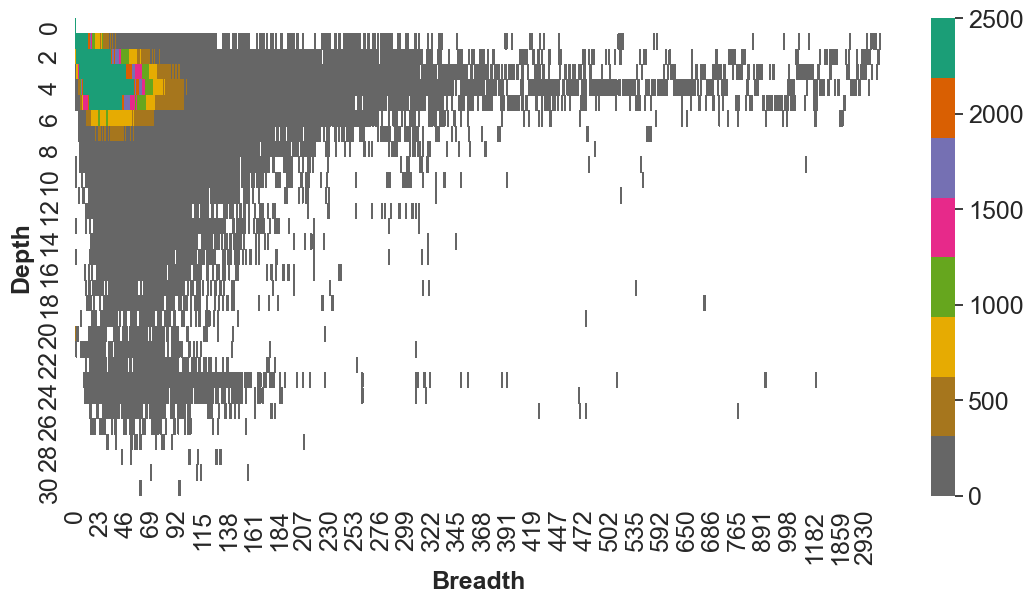

In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import matplotlib

data_path = os.path.join(os.getcwd(), "datasets")

##
## Heatmap: breadth & depth
##

# Data preparation
df = pd.read_csv(os.path.join(data_path,  "heatmap.csv"))
df = df.pivot(index="Depth", columns="Breadth", values="count")
 
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = False  
matplotlib.rcParams['axes.labelweight'] = 'bold'  
sb.set(rc={'figure.figsize': (13, 6.2), "font.size": 18, "axes.titlesize": 18, "axes.labelsize": 18,
           "legend.fontsize": 18, "xtick.labelsize": 18, "ytick.labelsize": 18}, style="white") 
plt.tight_layout()

# Generate and safe/show plot
heat_map = sb.heatmap(df, cmap="Dark2_r", robust=True, vmin=0, vmax=2500)
# plt.show()
plt.savefig(os.path.join(os.getcwd(), 'plots', "heatmap_breadth_depth.pdf"), dpi=600,
              transparent=False,  bbox_inches='tight', format="pdf")


### Number of all sub-nodes by depth
#### p2_number_of_subnodes_by_depth


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


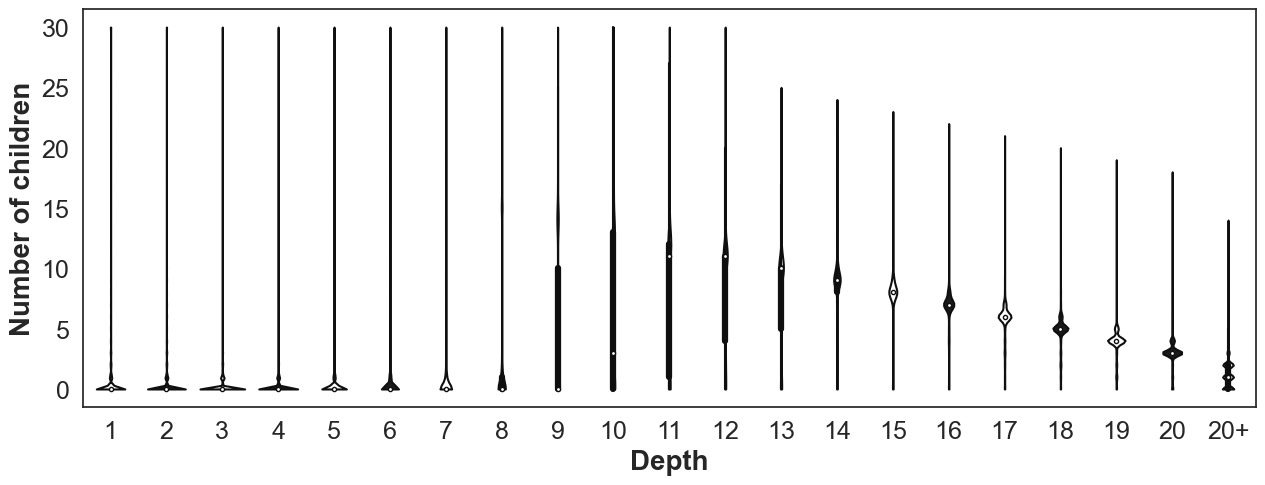

In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import matplotlib

data_path = os.path.join(os.getcwd(), "datasets")

##
## Nodes by site rank
##

# Data preparation
max_child_threshold = 30
depths_threshold = 20
df = pd.read_csv(os.path.join(data_path, 'p2_number_of_subnodes_by_depth.zip'))
df.loc[df['subnodes'] > max_child_threshold, 'subnodes'] = max_child_threshold
df.loc[df['depth'] > depths_threshold, 'depth'] = str(depths_threshold) + "+"
df['depth'] = df['depth'].astype(str)

# Plot preparation
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = False 
matplotlib.rcParams['axes.labelweight'] = 'bold' 
sb.set(rc={'figure.figsize': (13, 5.2), "font.size": 18, "axes.titlesize": 20, "axes.labelsize": 20,
           "legend.fontsize": 18, "xtick.labelsize": 18, "ytick.labelsize": 18}, style="white") 
plt.tight_layout()

# Generate and show plot
my_order = list(range(1, depths_threshold+1))
my_order = [str(x) for x in my_order]
my_order.append(str(depths_threshold) + "+")

violinplot = sb.violinplot(x="depth", y="subnodes",
                           palette=["w", "k"],
                           data=df, cut=0, order=my_order)
plt.xlabel("Depth")
plt.ylabel("Number of children")
plt.tight_layout()

# plt.show(block=True)
plt.savefig(os.path.join(os.getcwd(), 'plots', 'p2_number_of_subnodes_by_depth.pdf'), dpi=600, transparent=False,
            bbox_inches='tight', format="pdf")


### p5_boxplot_sim_of_children__parent_by_depth

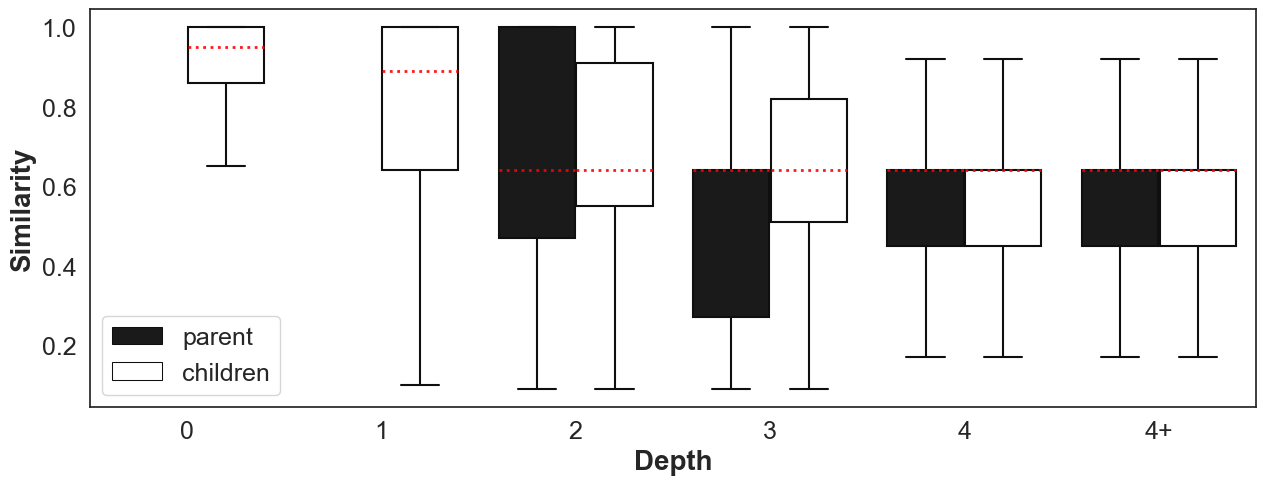

In [5]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import matplotlib

data_path = os.path.join(os.getcwd(), "datasets")

##
## Nodes by site rank
##

# Data preparation
df = pd.read_csv(os.path.join(data_path, "p5_boxplot_sim_of_children__parent_by_depth.zip"))
df['depth'] = df['depth'].mask(df['depth'] > 4, 5)

# Plot adjustments  
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = False  
matplotlib.rcParams['axes.labelweight'] = 'bold'  
sb.set(rc={'figure.figsize': (13, 5.2), "font.size": 18, "axes.titlesize": 20, "axes.labelsize": 20,
           "legend.fontsize": 18, "xtick.labelsize": 18, "ytick.labelsize": 18}, style="white")  
plt.tight_layout()

# Generate and safe/show plot
boxplot = sb.boxplot(x="depth", y="sim_all",
                     hue="sim_group",
                     palette=["k", "w"],
                     data=df, showfliers=False,
                     medianprops=dict(color="red", alpha=0.9, linestyle=':', linewidth=2.0),
                     flierprops=dict(markerfacecolor="#707070", marker="o", markersize=1)
                     )

boxplot.set_xticklabels([0, 1, 2, 3, 4, '4+'])
boxplot.set(ylabel='Similarity', xlabel='Depth')
plt.legend(loc='lower left', frameon=True)
plt.tight_layout()

# plt.show(block=True)
#plt.savefig(os.path.join(os.getcwd(), 'plots', 'p5_boxplot_sim_of_children__parent_by_depth.png'), dpi=600,
#            transparent=False, bbox_inches='tight', format="png")
plt.savefig(os.path.join(os.getcwd(), 'plots', 'p5_boxplot_sim_of_children__parent_by_depth.pdf'), dpi=600,
            transparent=False, bbox_inches='tight', format="pdf")



### P3: BoxPlot - Tree Sizes by Profiles __[not-included]__
#### p3_boxplot_tree_sizes_by_profile

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import os
import matplotlib.font_manager as font_manager

path = os.getcwd() + "/results/tracking/"
 

plt.figure(figsize=(14,6))

sns.set_theme(style="whitegrid")

df = pd.read_csv(os.getcwd() + "/datasets/p3_boxplot_tree_sizes_by_profile.zip")  
 


ax= sns.boxplot(x="browser_id", y="val",
            hue="label", palette=["w", "w"],
            data=df,showfliers = False)

#sns.despine(ax=ax, trim=True, offset={'left':1,'right':1,'top':1,'bottom':1})

ax.set(ylabel='Number of tracking requests & distinct trackers', xlabel='Clustered profiles')

font = font_manager.FontProperties(family='sans-serif',
                                   weight='bold',
                                   style='normal', size=16)
plt.legend(loc='best', frameon=False, prop=font)


plt.legend(loc='best', frameon=False, prop=font)
plt.xticks(weight='bold', fontname='sans-serif', size=16)
plt.yticks(weight='bold', fontname='sans-serif', size=16)
plt.xlabel("Profiles", weight='bold', fontname='sans-serif', size=16)
plt.ylabel('Tree Size', weight='bold', fontname='sans-serif', size=16)


plt.tight_layout()
plt.savefig(os.getcwd()  + "/p3_boxplot_tree_sizes_by_profile.pdf", dpi=600, transparent=False,   bbox_inches='tight', format="pdf")

#ax.get_figure().savefig(path+"/04_distinct_tracker_and_frequency_tracking_requests.pdf")
#ax.get_figure().savefig(path+"/04_distinct_tracker_and_frequency_tracking_requests.png")



### Distribution of nodes by depth and tracker, third-party
#### p1_distribution_of_nodes_by_tree

Plotting data...


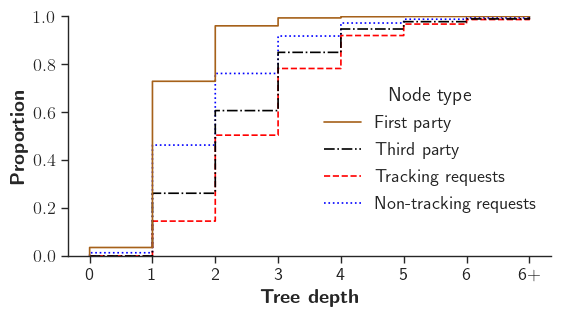

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import matplotlib

data_path = os.path.join(os.getcwd(), "datasets")

# Data preparation
df = pd.read_csv(os.path.join(data_path, "p1_distribution_of_nodes_by_tree.zip"))
df.loc[df['tree_depth'] > 6, 'tree_depth'] = "6+"
df['tree_depth'] = df['tree_depth'].astype(str)
df = df[df.label != 'All']
df = df.rename(columns={'label': 'Node type'})

# Plot adjustments
sb.set_theme(style="whitegrid", rc={"axes.labelweight": 'bold'})
sb.set_context("paper", font_scale=1.5)
sb.set_style("ticks")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif"
})

# Generate and safe/show plot
print("Plotting data...")
d = {'color': ["#C85200", "#898989", "#d7191c", "#006BA4"], "ls": [':', '--', '-.', '-']}
distplot = sb.displot(data=df.sort_values(by="tree_depth"), x="tree_depth", hue="Node type", kind="ecdf",
                      palette=["#a6611a", "#000000", "#FF0000", "#0000FF"],
                      hue_order=['First party', 'Third party', 'Tracking requests', 'Non-tracking requests'])
sb.move_legend(distplot, "center right", bbox_to_anchor=(.65, .5))

# Adjust the line styles
lss = [':', '--', '-.', 'solid']
axes = distplot.axes.flat
for ax in axes:
    for line, ls in zip(ax.lines, lss):
        line.set_linestyle(ls)

handles = distplot._legend.legendHandles[::-1]
for handle, ls in zip(handles, lss):
    handle.set_ls(ls)

distplot.set(xlabel=r"\textbf{Tree depth}", ylabel=r"\textbf{Proportion}")
distplot.set()
distplot.fig.set_size_inches(9, 3)

# plt.show(block=True)
plt.savefig(os.path.join(os.getcwd(), 'plots', "p1_distribution_of_nodes_by_tree.pdf"), dpi=600,
            transparent=False, bbox_inches='tight', format="pdf")


### P8: sim of nodes' children

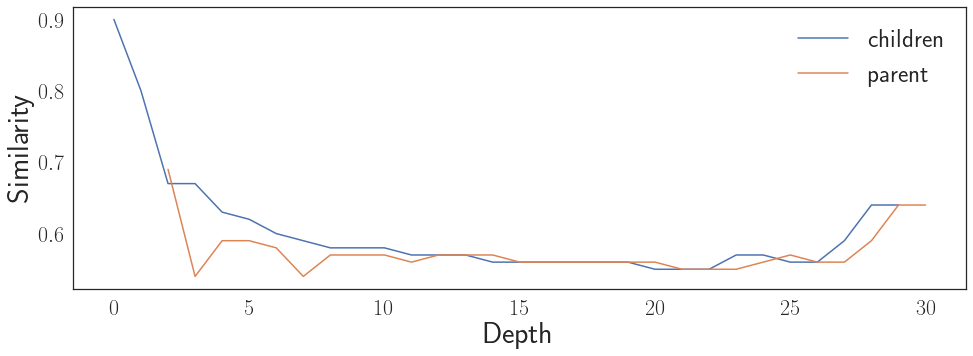

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import matplotlib

data_path = os.path.join(os.getcwd(), "datasets")

##
## Nodes by site rank
##

# Data preparation
df = pd.read_csv(os.path.join(data_path, "p8_sim_nodes_children.csv"))

# Plot adjustments
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = "Times New Roman"

plt.rc('text', usetex=True)
sb.set(rc={'figure.figsize': (16, 5.2), "font.size": 30, "axes.titlesize": 30, "axes.labelsize": 30, "legend.fontsize":25, "xtick.labelsize": 22, "ytick.labelsize": 22}, style="white")

# Generate and safe/show plot
lineplot = sb.lineplot(x="depth", y="avg", hue="sim_group", data=df)
lineplot.legend(loc='best', frameon=False)
plt.xlabel("Depth", fontweight='bold')
plt.ylabel('Similarity', fontweight='bold')

# plt.show(block=True)
plt.savefig(os.path.join(os.getcwd(), 'plots', "p8_sim_nodes_children.pdf"), dpi=600, transparent=False,
            bbox_inches='tight', format="pdf")


### P9: Distribution of sim for nodes and parents
#### p9_distribution_of_sim_by_nodes_parents
##### nodes that appear in all trees

C:\Users\NurullahDemir\AppData\Local\Temp\ipykernel_9864\664917158.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  catplot = sb.catplot(
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


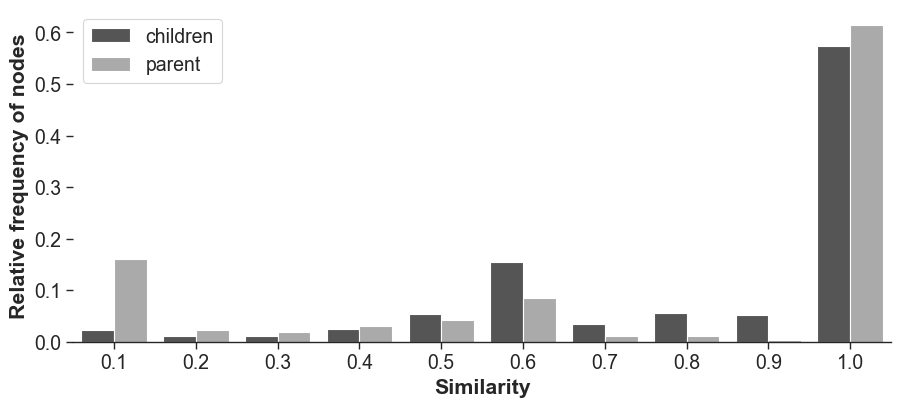

In [11]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import matplotlib
import matplotlib.style as style

data_path = os.path.join(os.getcwd(), "datasets")

##
## Distribution parents and nodes depth
##

# Data preparation
df = pd.read_csv(os.path.join(data_path, "p9_distribution_of_sim_by_nodes_parents_common_nodes.csv"))

# Adjust the font size and style  
sb.set(rc={"font.size": 22, "axes.titlesize": 2, "axes.labelsize": 2,
           "legend.fontsize": 22, "legend.title_fontsize": 22, "xtick.labelsize": 220, "ytick.labelsize": 22},
       style="white")
sb.set_theme(style="whitegrid", rc={"axes.labelweight": 'bold'})
sb.set_context("paper", font_scale=1.6)
style.use('tableau-colorblind10')
sb.set_style("ticks")

# Plot adjustments  
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['axes.labelweight'] = 'bold'

# Generate and safe/show plot
catplot = sb.catplot(
    data=df, kind="bar",
    x="sim", y="pct", hue="sim_group",
    ci="sd", palette="gray", height=6, legend_out=False)

catplot.despine(left=True)
catplot.set(ylabel='Relative frequency of nodes', xlabel='Similarity')
catplot.legend.set_title("")
catplot.fig.set_size_inches(10, 4)

# plt.show(block=True)
plt.savefig(os.path.join(os.getcwd(), 'plots', "p9_distribution_of_sim_by_nodes_parents_common_nodes.pdf"), dpi=600,
            transparent=False, bbox_inches='tight', format="pdf")


#### here we have also uniq nodes

In [ ]:
import seaborn as sns
import pandas as pd
import os



sns.set_theme(style="whitegrid")

df = pd.read_csv(os.getcwd() + "/datasets/p9_distribution_of_sim_by_nodes_parents_ALL.csv")
 

g = sns.catplot(
    data=df, kind="bar",
    x="sim", y="pct", hue="sim_group",
    ci="sd", palette="gray", height=6, legend_out=False) 


g.despine(left=True) 
g.set(ylabel='Relative frequency of nodes', xlabel='Similarity by Jaccard index' )
g.legend.set_title("Groups") 
g.savefig(os.getcwd() +"/p9_distribution_of_sim_by_nodes_parents_ALL.pdf")
 

### Number of nodes by sites' rank __[not-included]__
####  p10_number_of_nodes_per_rank

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import matplotlib


data_path = os.path.join(os.getcwd(), "datasets")

##
## Nodes by site rank
##

# Data preparation
df = pd.read_csv(os.path.join(data_path, "p10_number_of_nodes_per_rank.csv"))

# Plot adjustments
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = True
sb.set(rc={"font.size": 20, "axes.titlesize": 20, "axes.labelsize": 20}, style="white")
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Generate and safe/show plot
catplot = sb.catplot(
    data=df, kind="bar",
    x="rank_bucket", y="avg", hue="label",
    ci="sd", palette="gray", height=5, aspect=3, legend_out=False)

catplot.set_xticklabels(['Top 5k', 'Top 5k–10k', 'Top 10k–50k', 'Top 50k–50k', 'Top 250k–500k'])
plt.legend(title='Resource type', ncol=3, loc='upper right', frameon=False)
catplot.set(ylabel='Average number of nodes', xlabel="Site rank")

# plt.show(block=True)
plt.savefig(os.path.join(os.getcwd(), 'plots', "p10_number_of_nodes_per_rank.pdf"), dpi=600, transparent=False,
            bbox_inches='tight', format="pdf")


### Sim of IP Adresses in DNS
#### p11_dns_sim


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


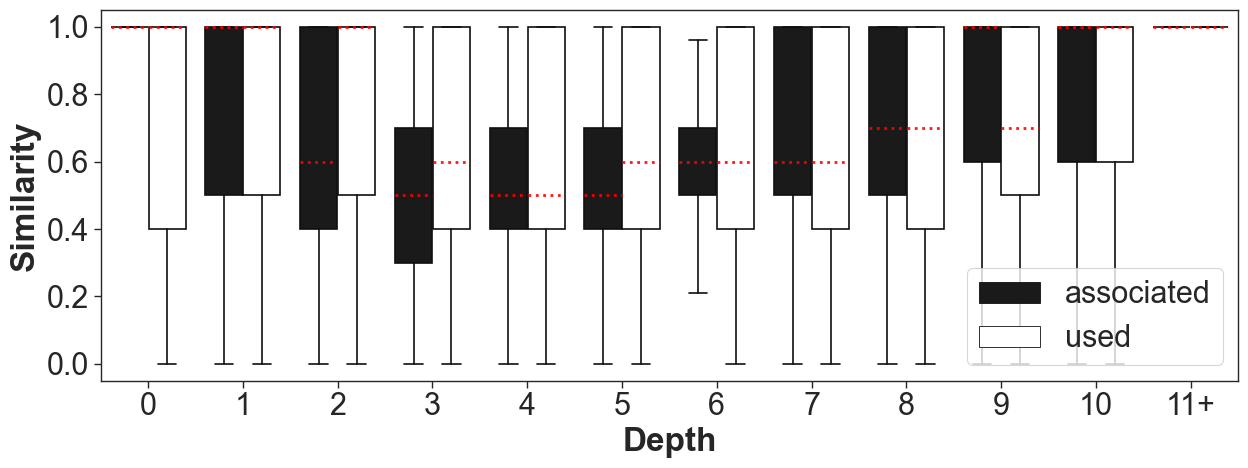

In [10]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import matplotlib
import matplotlib.style as style

data_path = os.path.join(os.getcwd(), "datasets")

##
## DNS similarity
##

# Data preparation
df = pd.read_csv(os.path.join(data_path, 'p11_dns_sim.zip'))
df['depth'] = df['depth'].mask(df['depth'] > 10, 11)

# Adjust the font size and style 
sb.set(rc={'figure.figsize': (13, 5.2), "font.size": 22, "axes.titlesize": 2, "axes.labelsize": 2,
           "legend.fontsize": 22, "legend.title_fontsize": 22, "xtick.labelsize": 220, "ytick.labelsize": 22},
       style="white")
sb.set_theme(style="whitegrid", rc={"axes.labelweight": 'bold'})
sb.set_context("paper", font_scale=2.5)
style.use('tableau-colorblind10')
sb.set_style("ticks")

# Plot adjustments
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['axes.labelweight'] = 'bold'

# Generate and safe/show plot
boxplot = sb.boxplot(x="depth", y="sim",
                     hue="label",
                     palette=["k", "w"],
                     data=df, showfliers=False,
                     medianprops=dict(color="red", alpha=0.9, linestyle=':', linewidth=2.0),
                     flierprops=dict(markerfacecolor="#707070", marker="o", markersize=1) 
                     )

boxplot.set(ylabel='Similarity', xlabel='Depth')
boxplot.set_xticklabels([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, '11+'])
plt.legend(loc='lower right', frameon=True)
plt.xlabel("Depth")
plt.ylabel('Similarity')
plt.tight_layout()

# plt.show(block=True)
plt.savefig(os.path.join(os.getcwd(), 'plots', 'p11_dns_sim.pdf'), dpi=600, transparent=False,
             bbox_inches='tight', format="pdf")


### P12_sim_by_resource_type

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


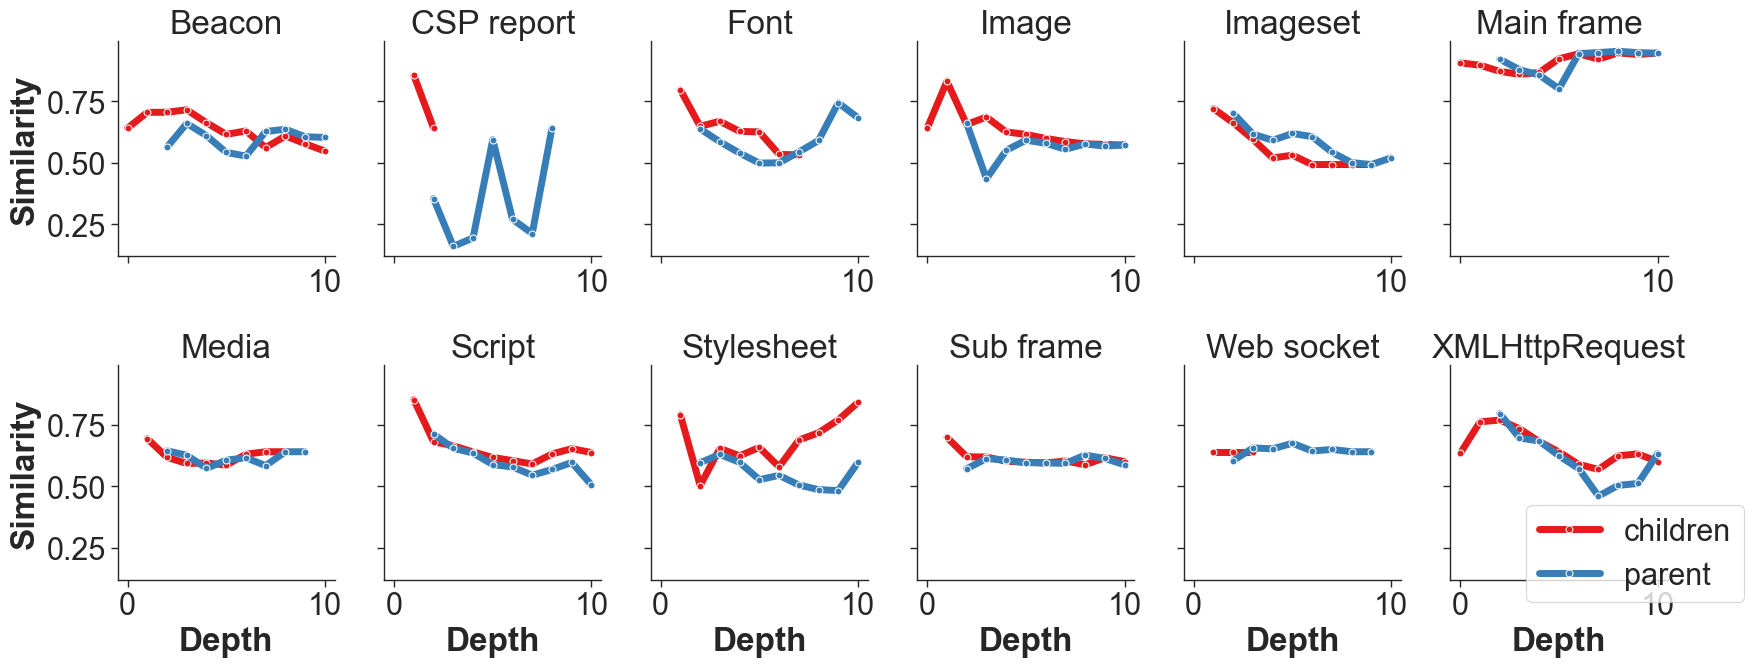

In [9]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import matplotlib
import matplotlib.style as style

# Data preparation
df = pd.read_csv(os.getcwd() + '/datasets/p12_sim_by_resource_type.csv')
df = df[df['depth'] < 11]

# Adjust the font size and style
sb.set(rc={"font.size": 22, "axes.titlesize": 2, "axes.labelsize": 2,
           "legend.fontsize": 22, "legend.title_fontsize": 22, "xtick.labelsize": 220, "ytick.labelsize": 22},
       style="white")
sb.set_theme(style="whitegrid", rc={"axes.labelweight": 'bold'})
sb.set_context("paper", font_scale=2.5)
style.use('tableau-colorblind10')
sb.set_style("ticks")

# Plot adjustments
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['axes.labelweight'] = 'bold'

g = sb.FacetGrid(df, col='resource_type', hue='sim_group', palette="Set1", col_wrap=6,
                 row_order=["beacon", "csp_report", "font", "image", "imageset", "main_frame", "media",
                            "script", "stylesheet", "sub_frame", "websocket", "xmlhttprequest"],
                 col_order=["beacon", "csp_report", "font",  "image", "imageset", "main_frame", "media", "script", "stylesheet", "sub_frame", "websocket", "xmlhttprequest"],
                 height=3) # Set the height of each subplot
g.map(sb.lineplot, 'depth', 'avg', errorbar=None,
      marker='o', markersize=5, linewidth=5.0)

# Increase the height of the figure by 20%
g.fig.set_figheight(g.fig.get_figheight()*1.2)

axes = g.axes.flatten()
axes[0].set_title("Beacon")
axes[1].set_title('CSP report')
axes[2].set_title('Font')
axes[3].set_title('Image')
axes[4].set_title('Imageset')
axes[5].set_title('Main frame')
axes[6].set_title('Media')
axes[7].set_title('Script')
axes[8].set_title('Stylesheet')
axes[9].set_title('Sub frame')
axes[10].set_title('Web socket')
axes[11].set_title('XMLHttpRequest')

plt.legend(bbox_to_anchor=(0.35, 0.35), loc='upper left', borderaxespad=0)
g.set_ylabels("Similarity")
g.set_xlabels("Depth")

plt.tight_layout()
g.savefig(os.getcwd() + "/plots/p12_sim_by_resource_type.pdf")


### p13_share_of_resource_per_sim

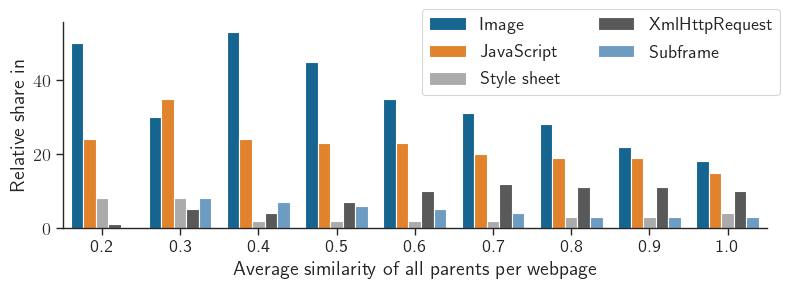

In [8]:
import sys
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.style as style
import os

# Data preparation
df = pd.read_csv(os.getcwd() + '/datasets/p13_share_of_resource_per_sim_parent.csv')

df = df[df['resource_type'] != 'beacon']
df = df[df['resource_type'] != 'csp_report']
df = df[df['resource_type'] != 'font']
df = df[df['resource_type'] != 'media']
df = df[df['resource_type'] != 'websocket']
df = df[df['resource_type'] != 'object']
df = df[df['resource_type'] != 'other']
df = df[df['resource_type'] != 'main_frame']

df = df.replace('sub_frame', 'Subframe', regex=False)
df = df.replace('xmlhttprequest', 'XmlHttpRequest', regex=False)
df = df.replace('stylesheet', 'Style sheet', regex=False)
df = df.replace('script', 'JavaScript', regex=False)
df = df.replace('image', 'Image', regex=False)
df = df.replace('imageset', 'Image', regex=False)
df = df.groupby(['sim', 'resource_type'], as_index=False).sum()

sb.set(rc={"font.size": 16, "axes.titlesize": 16, "axes.labelsize": 16,
           "legend.fontsize": 14, "legend.title_fontsize": 14, "xtick.labelsize": 16, "ytick.labelsize": 16},
       style="white")
sb.set_theme(style="whitegrid", rc={"axes.labelweight": 'bold'})
sb.set_context("paper", font_scale=1.5)
style.use('tableau-colorblind10')
sb.set_style("ticks")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif"
})

# Generate and safe/show plot
catplot = sb.catplot(
    data=df, kind="bar",
    x="sim", y="pct", hue="resource_type", legend_out=False, legend=False)
catplot.fig.legend(loc='upper right', ncol=2)
catplot.set_ylabels("Relative share in %")
catplot.set_xlabels("Average similarity of all parents per webpage")
catplot.fig.set_size_inches(8, 3)
plt.tight_layout()

# plt.show(block=True)
plt.savefig(os.path.join(os.getcwd(), 'plots', 'p13_share_of_resource_per_sim_parent.pdf'), dpi=600,
            transparent=False,
            bbox_inches='tight', format="pdf")


p14

In [7]:
import sys
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.style as style
import os

##
## Distribution parents and nodes depth
##

# Data preparation
df = pd.read_csv(os.getcwd() + '/datasets/p14_share_of_resource_per_sim_children.csv')

df = df[df['resource_type'] != 'beacon']
df = df[df['resource_type'] != 'csp_report']
df = df[df['resource_type'] != 'font']
df = df[df['resource_type'] != 'media']
df = df[df['resource_type'] != 'websocket']
df = df[df['resource_type'] != 'object']
df = df[df['resource_type'] != 'other']
df = df[df['resource_type'] != 'main_frame']

df = df.replace('sub_frame', 'Subframe', regex=False)
df = df.replace('xmlhttprequest', 'XmlHttpRequest', regex=False)
df = df.replace('stylesheet', 'Style sheet', regex=False)
df = df.replace('script', 'JavaScript', regex=False)
df = df.replace('image', 'Image', regex=False)
df = df.replace('imageset', 'Image', regex=False)
df = df.groupby(['sim', 'resource_type'], as_index=False).sum()


sb.set(rc={"font.size": 16, "axes.titlesize": 16, "axes.labelsize": 16,
           "legend.fontsize": 14, "legend.title_fontsize": 14, "xtick.labelsize": 16, "ytick.labelsize": 16})
sb.set_theme(style="whitegrid", rc={"axes.labelweight": 'bold'})
sb.set_context("paper", font_scale=1.5)
style.use('tableau-colorblind10')
sb.set_style("ticks")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif"
})

# Generate and safe/show plot
catplot = sb.catplot(
    data=df, kind="bar",
    x="sim", y="pct", hue="resource_type", legend_out=False, legend=False)
catplot.fig.legend(loc='upper right', ncol=2)
catplot.set_ylabels("Relative share in %")
catplot.set_xlabels("Average similarity of all children per webpage")
catplot.fig.set_size_inches(8, 3)
plt.tight_layout()

# plt.show(block=True)
plt.savefig(os.path.join(os.getcwd(), 'plots', 'p14_share_of_resource_per_sim_children.pdf'), dpi=600,
            transparent=False,
            bbox_inches='tight', format="pdf")


RuntimeError: latex was not able to process the following string:
b'\\\\textbf{Relative share in %}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (MiKTeX 21.1)
entering extended mode
(C:/Users/tobia/.matplotlib/tex.cache/97cf30dd554f85ad465e10b9265f88ed.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-01-09> xparse <2020-03-03>
(D:\MiKTeX\tex/latex/base\article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(D:\MiKTeX\tex/latex/base\size10.clo)) (D:\MiKTeX\tex/latex/type1cm\type1cm.sty
) (D:\MiKTeX\tex/latex/cm-super\type1ec.sty (D:\MiKTeX\tex/latex/base\t1cmr.fd)
) (D:\MiKTeX\tex/latex/base\inputenc.sty)
(D:\MiKTeX\tex/latex/geometry\geometry.sty
(D:\MiKTeX\tex/latex/graphics\keyval.sty)
(D:\MiKTeX\tex/generic/iftex\ifvtex.sty (D:\MiKTeX\tex/generic/iftex\iftex.sty)
) (D:\MiKTeX\tex/latex/geometry\geometry.cfg)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (D:\MiKTeX\tex/latex/base\textcomp.sty)
(D:\MiKTeX\tex/latex/l3backend\l3backend-dvips.def)
No file 97cf30dd554f85ad465e10b9265f88ed.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
)
Runaway argument?
{Relative share in \end {document} 
! File ended while scanning use of \textbf .
<inserted text> 
                \par 
<*> ....cache/97cf30dd554f85ad465e10b9265f88ed.tex
                                                  
No pages of output.
Transcript written on 97cf30dd554f85ad465e10b9265f88ed.log.




RuntimeError: latex was not able to process the following string:
b'\\\\textbf{Relative share in %}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (MiKTeX 21.1)
entering extended mode
(C:/Users/tobia/.matplotlib/tex.cache/97cf30dd554f85ad465e10b9265f88ed.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-01-09> xparse <2020-03-03>
(D:\MiKTeX\tex/latex/base\article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(D:\MiKTeX\tex/latex/base\size10.clo)) (D:\MiKTeX\tex/latex/type1cm\type1cm.sty
) (D:\MiKTeX\tex/latex/cm-super\type1ec.sty (D:\MiKTeX\tex/latex/base\t1cmr.fd)
) (D:\MiKTeX\tex/latex/base\inputenc.sty)
(D:\MiKTeX\tex/latex/geometry\geometry.sty
(D:\MiKTeX\tex/latex/graphics\keyval.sty)
(D:\MiKTeX\tex/generic/iftex\ifvtex.sty (D:\MiKTeX\tex/generic/iftex\iftex.sty)
) (D:\MiKTeX\tex/latex/geometry\geometry.cfg)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (D:\MiKTeX\tex/latex/base\textcomp.sty)
(D:\MiKTeX\tex/latex/l3backend\l3backend-dvips.def)
(97cf30dd554f85ad465e10b9265f88ed.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
)
Runaway argument?
{Relative share in \end {document} 
! File ended while scanning use of \textbf .
<inserted text> 
                \par 
<*> ....cache/97cf30dd554f85ad465e10b9265f88ed.tex
                                                  
No pages of output.
Transcript written on 97cf30dd554f85ad465e10b9265f88ed.log.




<Figure size 800x300 with 1 Axes>

# p15 sim by number of resources

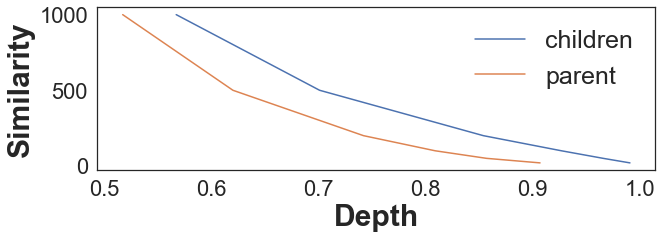

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import matplotlib

data_path = os.path.join(os.getcwd(), "datasets")

##
## Nodes by site rank
##

# Data preparation
df = pd.read_csv(os.path.join(data_path, "p15_sim_by_number_of_resources.csv"))

# Plot adjustments
#matplotlib.rcParams['pdf.fonttype'] = 42
#matplotlib.rcParams['ps.fonttype'] = 42
#matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['font.family'] = "Times New Roman"

#plt.rc('text', usetex=True)
sb.set(rc={'figure.figsize': (16, 5.2), "font.size": 30, "axes.titlesize": 30, "axes.labelsize": 30, "legend.fontsize":25, "xtick.labelsize": 22, "ytick.labelsize": 22}, style="white")

# Generate and safe/show plot
lineplot = sb.lineplot(x="avg", y="grp", hue="sim_group", data=df)
lineplot.legend(loc='best', frameon=False)
plt.xlabel("Depth", fontweight='bold')
plt.ylabel('Similarity', fontweight='bold')
 
lineplot.get_figure().set_size_inches(10, 3)

# plt.show(block=True)
plt.savefig(os.path.join(os.getcwd(), 'plots', "p8_sim_nodes_children.pdf"), dpi=600, transparent=False,
            bbox_inches='tight', format="pdf")


## p16: sim of children by rank

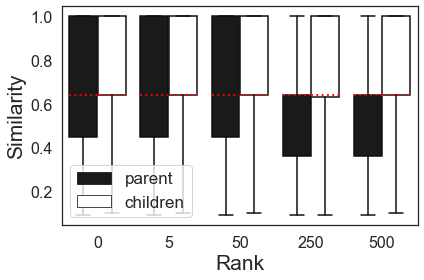

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import matplotlib

data_path = os.path.join(os.getcwd(), "datasets")

##
## Nodes by site rank
##

# Data preparation
df = pd.read_csv(os.path.join(data_path, "p16_sim_by_rank.zip"))
#df['rank_bucket'] = df['rank_bucket'].mask(df['depth'] > 4, 5)
 
# Plot adjustments
#matplotlib.rcParams['pdf.fonttype'] = 42
#matplotlib.rcParams['ps.fonttype'] = 42
#matplotlib.rcParams['text.usetex'] = True
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
sb.set(rc={'figure.figsize': (10, 4), "font.size": 21, "axes.titlesize": 21, "axes.labelsize": 21, "legend.fontsize":17, "xtick.labelsize": 16, "ytick.labelsize": 16}, style="white")

# Generate and safe/show plot
boxplot = sb.boxplot(x="rank_bucket", y="sim_all",
                     hue="sim_group",
                     palette=["k", "w"],
                     data=df, showfliers=False,
                     medianprops=dict(color="red", alpha=0.9, linestyle=':', linewidth=2.0),
                     flierprops=dict(markerfacecolor="#707070", marker="o", markersize=1)
                     )

#boxplot.set_xticklabels([0, 1, 2, 3, 4, '4+'])
boxplot.set(ylabel='Similarity', xlabel='Rank')
plt.legend(loc='lower left', frameon=True)
plt.tight_layout()

# plt.show(block=True)
#plt.savefig(os.path.join(os.getcwd(), 'plots', 'p5_boxplot_sim_of_children__parent_by_depth.png'), dpi=600,
#            transparent=False, bbox_inches='tight', format="png")
plt.savefig(os.path.join(os.getcwd(), 'plots', 'p16_boxplot_sim_of_children__parent_by_depth.pdf'), dpi=600,
            transparent=False, bbox_inches='tight', format="pdf")
